In [2]:
# @title
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import random as rand
import scipy.constants as const
import math
import itertools
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

# ***Ising Model - No Interactions***

The energy is:  $E=−μh∑S_i$

Assuming:  $h=1⋅K_bT$

$T=300K$

# **Genrate Random Spin Grid**

In [3]:
# @title Genrates random grid { display-mode: "form" }
plt.style.use('_mpl-gallery-nogrid')

Nx = 25
Ny = 25

Z = np.random.choice([-0.5,0.5],(Nx,Ny))

**We start at a random grid of spins**

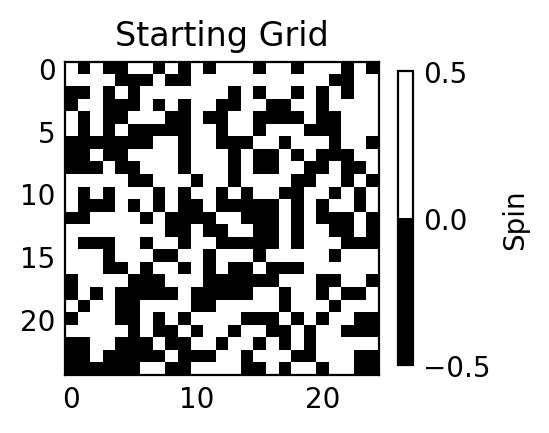

In [4]:
# @title Displays Grid { display-mode: "form" }
fig, ax = plt.subplots(dpi=200)
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin', shrink=0.75)
plt.title('Starting Grid')
plt.show()

In [5]:
# @title Constants definition: { display-mode: "form" }
T = 300
Kb = const.Boltzmann/(1.602*(10**-19)) #Boltzmann in eV
h = 1*Kb*T
mu_magnetic_moment = 1
number_of_spins = Nx*Ny

In [6]:
# @title Energy and magnetization functions: { display-mode: "form" }
def calculate_config_energy(z):
  return(-mu_magnetic_moment*h*np.sum(z))

def calculate_config_magnetiztion(z):
  return(np.sum(z))

### **Propagate using Monte-Carlo Metropolis-Hastings Method**

In [7]:
# @title Monte-Carlo metropolis hastings method: { display-mode: "form" }
#Monte-Carlo - Metropolis Hastings Method
energy_list_by_T = []
average_magnetization_per_spin_list_by_T = []
grids = []
properties_dictionary = {} #Key = temprature, Value = [Grid, energy, magnetization]
iterations = 12500
max_temp = 501
T = range(1, max_temp, 10)

for t in T:
  energy_list = []
  magnetization_list = []
  Z_copy = Z.copy()
  initial_energy = calculate_config_energy(Z_copy)
  energy_list.append(initial_energy)
  average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
  magnetization_list.append(average_magnetization)
  for i in range(iterations):
    #step 0 - calculate current configuration energy
    previous_energy = calculate_config_energy(Z_copy)

    #step 1 - choose random spin
    random_x = rand.randrange(0,Nx)
    random_y = rand.randrange(0,Ny)

    #step 2 - flip spin
    Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    #step 3 - calculate energy of new config
    new_energy = calculate_config_energy(Z_copy)
    if new_energy <= previous_energy:
      previous_energy = new_energy
    else:
      delta_energy = new_energy - previous_energy
      p = rand.random()
      P_condition = math.exp(-(delta_energy)/(Kb*t))
      if p < P_condition:
          previous_energy = new_energy
      else:
        Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    energy_list.append(previous_energy)
    average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
    magnetization_list.append(average_magnetization)

  properties_dictionary[t] = [Z_copy, previous_energy, average_magnetization]
  energy_list_by_T.append(energy_list)
  average_magnetization_per_spin_list_by_T.append(magnetization_list)

energy_list_by_T = np.array(energy_list_by_T)
average_magnetization_per_spin_list_by_T = np.array(average_magnetization_per_spin_list_by_T)


average_energy_per_spin = calculate_config_energy(Z_copy)/number_of_spins
average_magnetization_per_spin = calculate_config_magnetiztion(Z_copy)/number_of_spins

**This is the average energy per spin as a function of both iteration and temprature.**

**We can see that as we increase the temprature the Monte-Carlo simulation does not reach a state of minimal energy.**

**This is not trivial as the energy of the system is not temprature dependent:**

$Eᵢ = μ⋅h⋅∑(Sᵢ)$

**This behavior can be explained from the Monte-Carlo process. In the simulation, after making a random change we test to see if such a change will help us at arriving to minimal energy. If the energy is increased in the process we decide to keep it if this change is probable:**

$\frac{P(S_k)}{P(S_m)}=e^{β(E_m-E_k)}$  where $ β=\frac{1}{kT}$

**Here we can see the temprature dependence of the process and understand why the process does not always resolve to minimal energy.**

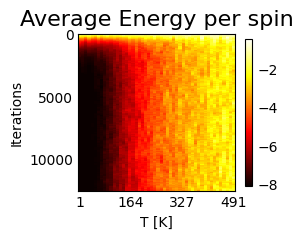

In [8]:
# @title Displays average energy graph { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
z1 = energy_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z1, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Energy per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

**Grid configuration at different tempratures**

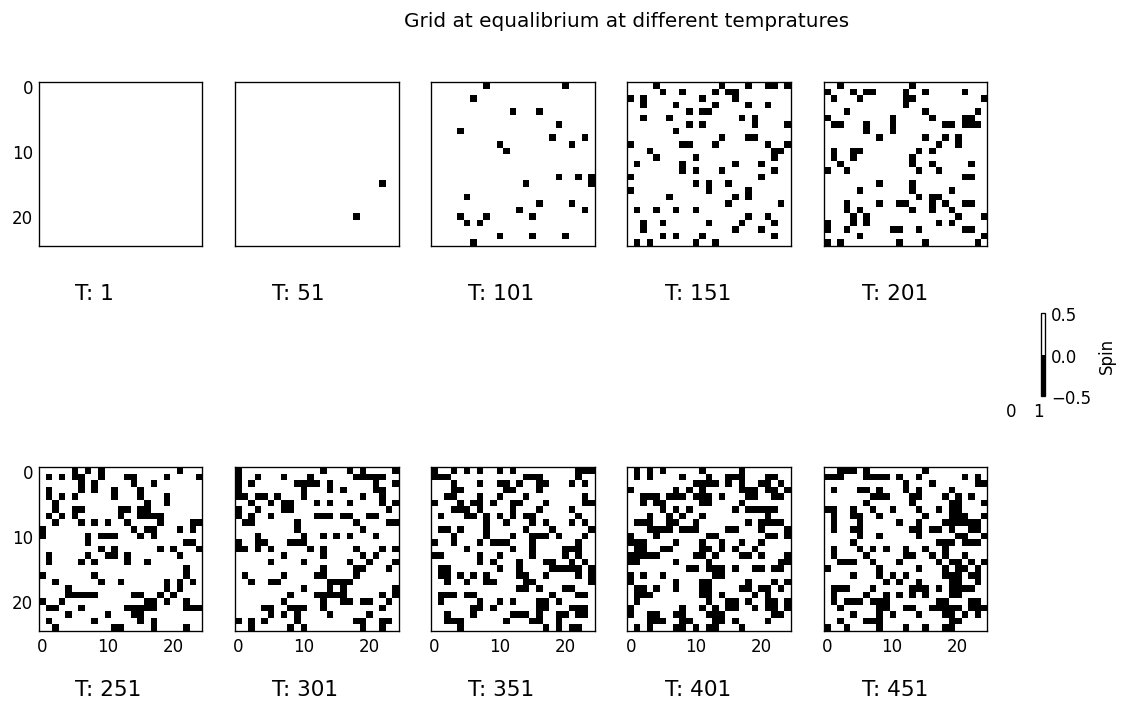

In [9]:
# @title Displays grid configs { display-mode: "form" }
Z_by_T = [properties_dictionary[t][0] for t in range(1,max_temp,50)]
Nr = 2
Nc = int(len(Z_by_T)/2)

fig, axs = plt.subplots(Nr, Nc, sharex='col', sharey='row', figsize=(10,6), dpi = 120)
fig.suptitle('Grid at equalibrium at different tempratures')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.445, 0.05, 0.115], frameon=False)
cbar_ax.tick_params(left=False, labelleft=False,bottom=False, top=False)

images = []
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
c=0
for i in range(Nr):
    for j in range(Nc):
      data = Z_by_T[c]
      im = axs[i, j].imshow(data, cmap=cmap, norm=norm)
      images.append(im)
      axs[i, j].label_outer()
      fig.text(j/(Nc*1.22) + 0.04 , 1 - (1.1*i/Nr + 0.42), f"T: {range(1,max_temp,50)[c]}", fontdict={'fontsize': 13})
      c += 1

fig.colorbar(images[5], ax=cbar_ax, label='Spin', extend='neither', fraction=0.5)
plt.show()

**In the figure below we can see the behavior of the spin as a function of both iterations and temprature.**

**As expected, as the number of iterations increases the system reaches equilibrium and this equalibrium is dependent on the temprature.**

**At low tempratures the energy goes to zero and the spins align with the extarnal electric field.**

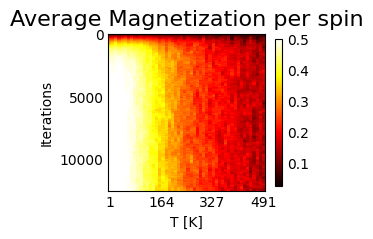

In [10]:
# @title Displays average magnetization { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
z2 = average_magnetization_per_spin_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z2, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Magnetization per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

**From the plots above we can clearly see that we got the behavior expected at equillibrium.**

**As the energy went to minimum the spin pointed in the direction of the external field.**

**In addition we can see that as the temprature increased the flactuations also increases.**

# **Spin down starting point**

**We start at a spin down grid which is against the external field**

In [11]:
# @title Generates grid { display-mode: "form" }
plt.style.use('_mpl-gallery-nogrid')

Nx = 25
Ny = 25

Z = np.ones((Nx,Ny))*-0.5

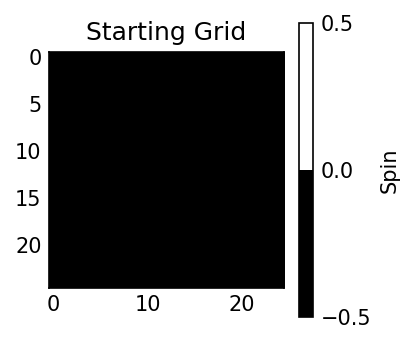

In [12]:
# @title Displays grid { display-mode: "form" }
fig, ax = plt.subplots(dpi=150)
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin')
plt.title('Starting Grid')
plt.show()

In [13]:
# @title Monte-Carlo metropolis hastings method: { display-mode: "form" }
#Monte-Carlo - Metropolis Hastings Method
energy_list_by_T = []
average_magnetization_per_spin_list_by_T = []
grids = []
properties_dictionary = {} #Key = temprature, Value = [Grid, energy, magnetization]
iterations = 12500
max_temp = 501
T = range(1, max_temp, 10)

for t in T:
  energy_list = []
  magnetization_list = []
  Z_copy = Z.copy()
  initial_energy = calculate_config_energy(Z_copy)
  energy_list.append(initial_energy)
  average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
  magnetization_list.append(average_magnetization)
  for i in range(iterations):
    #step 0 - calculate current configuration energy
    previous_energy = calculate_config_energy(Z_copy)

    #step 1 - choose random spin
    random_x = rand.randrange(0,Nx)
    random_y = rand.randrange(0,Ny)

    #step 2 - flip spin
    Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    #step 3 - calculate energy of new config
    new_energy = calculate_config_energy(Z_copy)
    if new_energy <= previous_energy:
      previous_energy = new_energy
    else:
      delta_energy = new_energy - previous_energy
      p = rand.random()
      P_condition = math.exp(-(delta_energy)/(Kb*t))
      if p < P_condition:
          previous_energy = new_energy
      else:
        Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    energy_list.append(previous_energy)
    average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
    magnetization_list.append(average_magnetization)

  properties_dictionary[t] = [Z_copy, previous_energy, average_magnetization]
  energy_list_by_T.append(energy_list)
  average_magnetization_per_spin_list_by_T.append(magnetization_list)

energy_list_by_T = np.array(energy_list_by_T)
average_magnetization_per_spin_list_by_T = np.array(average_magnetization_per_spin_list_by_T)


average_energy_per_spin = calculate_config_energy(Z_copy)/number_of_spins
average_magnetization_per_spin = calculate_config_magnetiztion(Z_copy)/number_of_spins

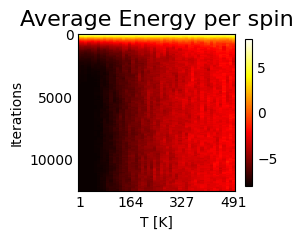

In [14]:
# @title Displays the average energy graph { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
z1 = energy_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z1, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Energy per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

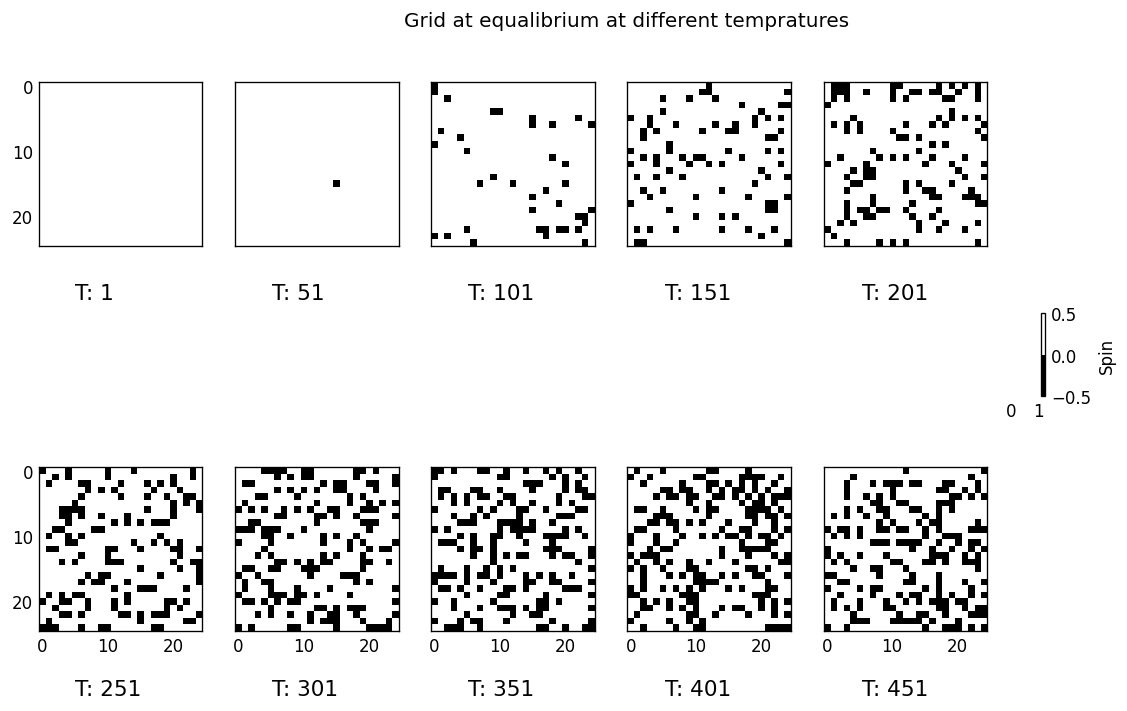

In [15]:
# @title Displays grid configs { display-mode: "form" }
Z_by_T = [properties_dictionary[t][0] for t in range(1,max_temp,50)]
Nr = 2
Nc = int(len(Z_by_T)/2)

fig, axs = plt.subplots(Nr, Nc, sharex='col', sharey='row', figsize=(10,6), dpi = 120)
fig.suptitle('Grid at equalibrium at different tempratures')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.445, 0.05, 0.115], frameon=False)
cbar_ax.tick_params(left=False, labelleft=False,bottom=False, top=False)

images = []
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
c=0
for i in range(Nr):
    for j in range(Nc):
      data = Z_by_T[c]
      im = axs[i, j].imshow(data, cmap=cmap, norm=norm)
      images.append(im)
      axs[i, j].label_outer()
      fig.text(j/(Nc*1.22) + 0.04 , 1 - (1.1*i/Nr + 0.42), f"T: {range(1,max_temp,50)[c]}", fontdict={'fontsize': 13})
      c += 1

fig.colorbar(images[5], ax=cbar_ax, label='Spin', extend='neither', fraction=0.5)
plt.show()

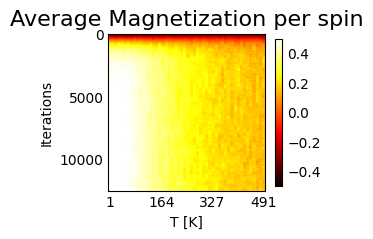

In [16]:
# @title Displays average magnetization { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
z2 = average_magnetization_per_spin_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z2, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Magnetization per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

**In the case of spin down starting point we see that the behavior at equilibrium is the same as in the random state starting point.**

**The differnce is that the starting energy here is much grater than before and the average magnetization is exactly -0.5**

# **Spin up starting point**

**We start at a spin up grid which is in the direction of the external field**

In [17]:
# @title Generates grid { display-mode: "form" }
plt.style.use('_mpl-gallery-nogrid')

Nx = 25
Ny = 25

Z = np.ones((Nx,Ny))*0.5

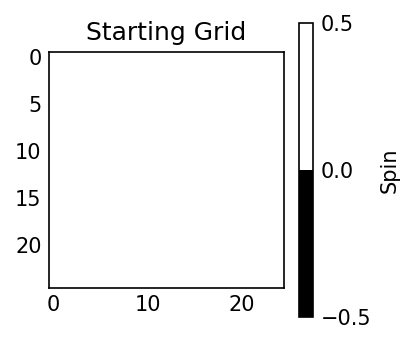

In [18]:
# @title Displays grid { display-mode: "form" }
fig, ax = plt.subplots(dpi=150)
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin')
plt.title('Starting Grid')
plt.show()

In [19]:
# @title Monte-Carlo metropolis hastings method: { display-mode: "form" }
#Monte-Carlo - Metropolis Hastings Method
energy_list_by_T = []
average_magnetization_per_spin_list_by_T = []
grids = []
properties_dictionary = {} #Key = temprature, Value = [Grid, energy, magnetization]
iterations = 7500
max_temp = 401
T = range(1, max_temp, 10)

for t in T:
  energy_list = []
  magnetization_list = []
  Z_copy = Z.copy()
  initial_energy = calculate_config_energy(Z_copy)
  energy_list.append(initial_energy)
  average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
  magnetization_list.append(average_magnetization)
  for i in range(iterations):
    #step 0 - calculate current configuration energy
    previous_energy = calculate_config_energy(Z_copy)

    #step 1 - choose random spin
    random_x = rand.randrange(0,Nx)
    random_y = rand.randrange(0,Ny)

    #step 2 - flip spin
    Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    #step 3 - calculate energy of new config
    new_energy = calculate_config_energy(Z_copy)
    if new_energy <= previous_energy:
      previous_energy = new_energy
    else:
      delta_energy = new_energy - previous_energy
      p = rand.random()
      P_condition = math.exp(-(delta_energy)/(Kb*t))
      if p < P_condition:
          previous_energy = new_energy
      else:
        Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    energy_list.append(previous_energy)
    average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
    magnetization_list.append(average_magnetization)

  properties_dictionary[t] = [Z_copy, previous_energy, average_magnetization]
  energy_list_by_T.append(energy_list)
  average_magnetization_per_spin_list_by_T.append(magnetization_list)

energy_list_by_T = np.array(energy_list_by_T)
average_magnetization_per_spin_list_by_T = np.array(average_magnetization_per_spin_list_by_T)


average_energy_per_spin = calculate_config_energy(Z_copy)/number_of_spins
average_magnetization_per_spin = calculate_config_magnetiztion(Z_copy)/number_of_spins

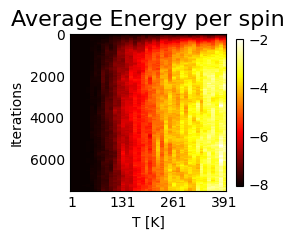

In [20]:
# @title Displays the average energy graph { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
aspect = len(X)/len(Y)
z1 = energy_list_by_T.transpose()

plt.imshow(z1, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Energy per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

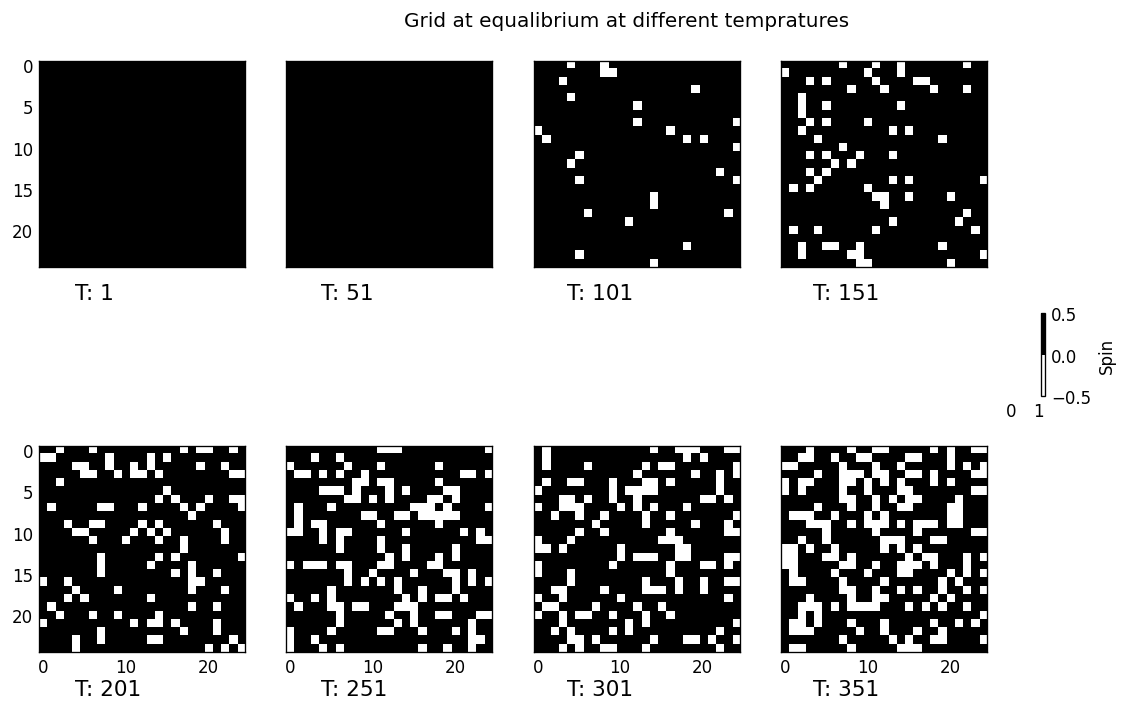

In [21]:
# @title Displays grid configs { display-mode: "form" }
Z_by_T = [properties_dictionary[t][0] for t in range(1,max_temp,50)]
Nr = 2
Nc = int(len(Z_by_T)/2)

fig, axs = plt.subplots(Nr, Nc, sharex='col', sharey='row', figsize=(10,6), dpi = 120)
fig.suptitle('Grid at equalibrium at different tempratures')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.445, 0.05, 0.115], frameon=False)
cbar_ax.tick_params(left=False, labelleft=False,bottom=False, top=False)

images = []
cmap = colors.ListedColormap(['white', 'black'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
c=0
for i in range(Nr):
    for j in range(Nc):
      data = Z_by_T[c]
      im = axs[i, j].imshow(data, cmap=cmap, norm=norm)
      images.append(im)
      axs[i, j].label_outer()
      fig.text(j/(Nc*1.22) + 0.04 , 1 - (1.1*i/Nr + 0.42), f"T: {range(1,max_temp,50)[c]}", fontdict={'fontsize': 13})
      c += 1

fig.colorbar(images[5], ax=cbar_ax, label='Spin', extend='neither', fraction=0.5)
plt.show()

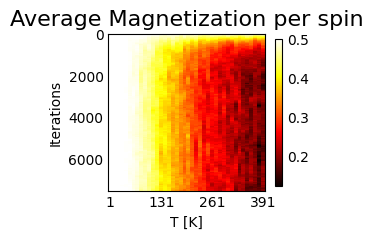

In [22]:
# @title Displays average magnetization { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
aspect = len(X)/len(Y)
z2 = average_magnetization_per_spin_list_by_T.transpose()

plt.imshow(z2, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Magnetization per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

**In the case of spin up starting point we see that the behavior at equilibrium is the same as in the other states.**

**The differnce here is that the starting energy is lower than the equilibrium at most tempratures.**

**Here also the magnetization starts at an ordered state of spins but as the temprature increases it becomes more likely to find the system in an unordered spin state and an higher energy state.**

# **Question 2 - adding Nearest Neighbours interactions**

The energy is: $E=-J⋅∑S_iS_j-μh∑S_i$

Assuming: $h=0$

Final energy expression: $E=-J⋅∑S_iS_j$

# **Random Spin starting point $J=5KbT$**

In [39]:
# @title Genrates random grid { display-mode: "form" }
plt.style.use('_mpl-gallery-nogrid')

Nx = 20
Ny = 20

Z = np.random.choice([-0.5,0.5],(Nx,Ny))

**We start at a randomly distributed grid on spins**

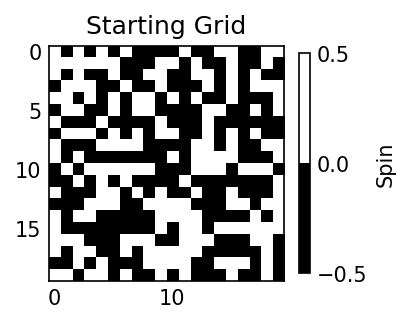

In [40]:
# @title Displays Grid { display-mode: "form" }
fig, ax = plt.subplots(dpi=150)
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin', shrink=0.75)
plt.title('Starting Grid')
plt.show()

In [41]:
# @title Constants definition: { display-mode: "form" }
T = 300
Kb = const.Boltzmann/(1.602*(10**-19)) #Boltzmann in eV
J = 5*Kb*T
number_of_spins = Nx*Ny

In [42]:
# @title Energy and magnetization functions: { display-mode: "form" }
def calculate_config_energy(z):
  rows,cols = z.shape
  e = 0
  for i in range(rows):
    for j in range(cols):
      right, left, lower, upper = (0,0,0,0)
      if j+1 != cols:
        right = z[i][j+1]
      if j-1 >= 0:
        left = z[i][j-1]
      if i+1 != rows:
        lower = z[i+1][j]
      if i-1 >= 0:
        upper = z[i-1][j]
      e += z[i][j]*(right + left + lower + upper)
  return(-J*e)

def calculate_config_magnetiztion(z):
  return(np.sum(z))

In [43]:
# @title Monte-Carlo metropolis hastings method: { display-mode: "form" }
#Monte-Carlo - Metropolis Hastings Method
energy_list_by_T = []
average_magnetization_per_spin_list_by_T = []
grids = []
properties_dictionary = {} #Key = temprature, Value = [Grid, energy, magnetization]
iterations = 10000
max_temp = 601
T = range(1, max_temp, 50)

for t in T:
  energy_list = []
  magnetization_list = []
  Z_copy = Z.copy()
  initial_energy = calculate_config_energy(Z_copy)
  energy_list.append(initial_energy)
  average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
  magnetization_list.append(average_magnetization)
  for i in range(iterations):
    #step 0 - calculate current configuration energy
    previous_energy = calculate_config_energy(Z_copy)

    #step 1 - choose random spin
    random_x = rand.randrange(0,Nx)
    random_y = rand.randrange(0,Ny)

    #step 2 - flip spin
    Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    #step 3 - calculate energy of new config
    new_energy = calculate_config_energy(Z_copy)
    if new_energy <= previous_energy:
      previous_energy = new_energy
    else:
      delta_energy = new_energy - previous_energy
      p = rand.random()
      P_condition = math.exp(-(delta_energy)/(Kb*t))
      if p < P_condition:
          previous_energy = new_energy
      else:
        Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    energy_list.append(previous_energy)
    average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
    magnetization_list.append(average_magnetization)

  properties_dictionary[t] = [Z_copy, previous_energy, average_magnetization]
  energy_list_by_T.append(energy_list)
  average_magnetization_per_spin_list_by_T.append(magnetization_list)

energy_list_by_T = np.array(energy_list_by_T)
average_magnetization_per_spin_list_by_T = np.array(average_magnetization_per_spin_list_by_T)


average_energy_per_spin = calculate_config_energy(Z_copy)/number_of_spins
average_magnetization_per_spin = calculate_config_magnetiztion(Z_copy)/number_of_spins

**This is the average energy per spin as a function of both iteration and temprature.**

**We can see that in these conditions the energy at equillibrium does not depend (strongly) on temprature. This is due to the large $J$ value.**

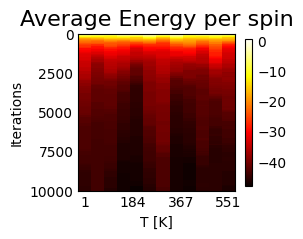

In [44]:
# @title Displays average energy graph { display-mode: "form" }
# Load and format data

X = np.array(T)
Y = np.array(range(iterations))
aspect = len(X)/len(Y)
z1 = energy_list_by_T.transpose()

plt.imshow(z1, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Energy per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

**Grid configuration at different tempratures**

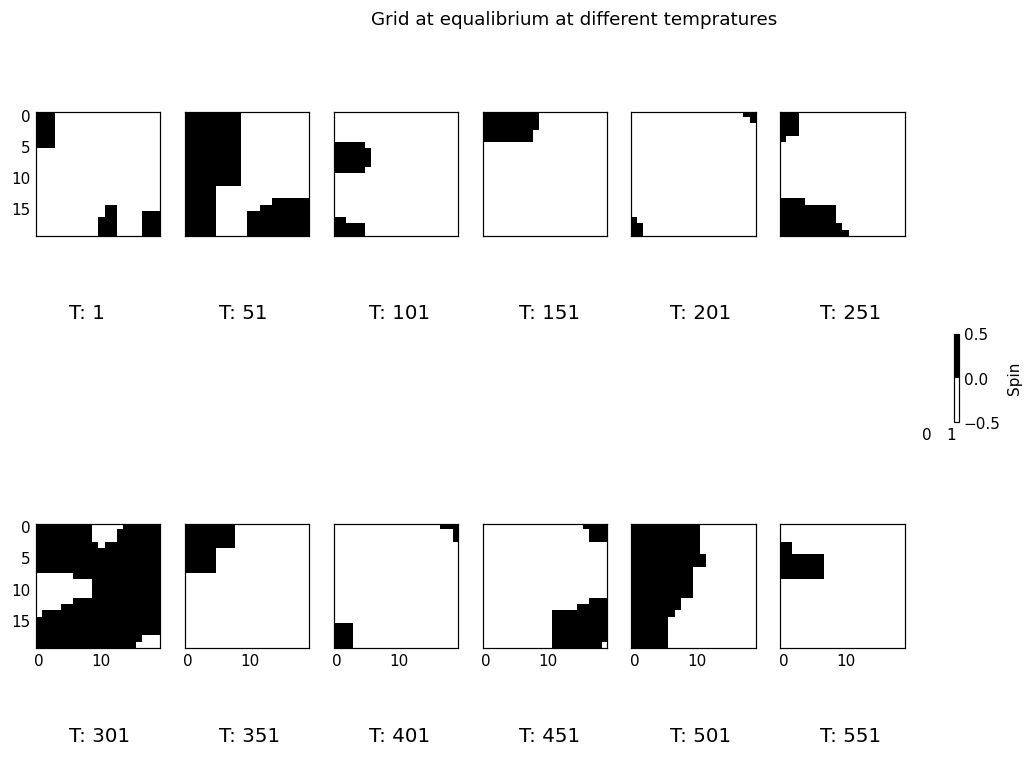

In [45]:
# @title Displays grid configs { display-mode: "form" }
Z_by_T = [properties_dictionary[t][0] for t in range(1,max_temp,50)]
Nr = 2
Nc = int(len(Z_by_T)/2)

fig, axs = plt.subplots(Nr, Nc, sharex='col', sharey='row', figsize=(10,7), dpi = 110)
fig.suptitle('Grid at equalibrium at different tempratures')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.445, 0.05, 0.115], frameon=False)
cbar_ax.tick_params(left=False, labelleft=False,bottom=False, top=False)

images = []
cmap = colors.ListedColormap(['white', 'black'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
c=0
for i in range(Nr):
    for j in range(Nc):
      data = Z_by_T[c]
      im = axs[i, j].imshow(data, cmap=cmap, norm=norm)
      images.append(im)
      axs[i, j].label_outer()
      fig.text(j/(Nc*1.22) + 0.04 , 1 - (1.1*i/Nr + 0.42), f"T: {range(1,max_temp,50)[c]}", fontdict={'fontsize': 13})
      c += 1

fig.colorbar(images[5], ax=cbar_ax, label='Spin', extend='neither', fraction=0.5)
plt.show()

**From the figure above we can understand the spin behavior of the system.**

**From the energy expression: $E=-J⋅∑S_iS_j$ we can say that for a given spin in the grid, the energy will be lower if the spins neighbouring him are from the same type (up/down).**

**This results in the formation of "Spin Islands" as we can see in the figure above.**

**In the figure below we can see the behavior of the spin as a function of both iterations and temprature.**

**The behavior of this graph is dependent on the starting conditions and on the random changes in the performed in the simulation. It is just as likely we could recieve a graph that converges to a negative spin (-0.5)**

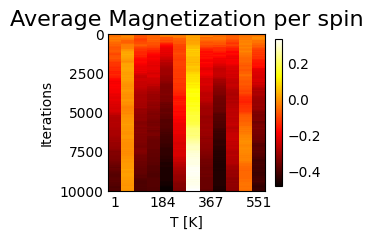

In [46]:
# @title Displays average magnetization { display-mode: "form" }
X = np.array(T)
Y = np.array(range(iterations))
z2 = average_magnetization_per_spin_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z2, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Magnetization per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

**Overall this system behaves very differently from the previous system**

# **Random Spin starting point $J=0.5KbT$**

In [31]:
# @title Genrates random grid { display-mode: "form" }
plt.style.use('_mpl-gallery-nogrid')

Nx = 15
Ny = 15

X, Y = np.meshgrid(np.linspace(-int(Nx/2),int(Nx/2), Nx),np.linspace(-int(Ny/2),int(Ny/2), Ny),indexing='xy')
Z = np.ones((Nx,Ny))
Z = [[Z[i,j]*rand.randrange(-1,2,2)/2 for i in range(Nx)] for j in range(Ny)]
Z = np.array(Z)

**We start at a randomly distributed grid on spins**

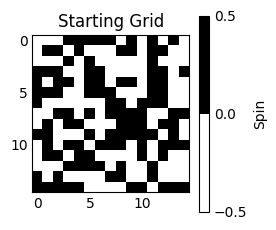

In [32]:
# @title Displays Grid { display-mode: "form" }
fig, ax = plt.subplots()
cmap = colors.ListedColormap(['white', 'black'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin')
plt.title('Starting Grid')
plt.show()

In [33]:
# @title Constants definition: { display-mode: "form" }
T = 300
Kb = const.Boltzmann/(1.602*(10**-19)) #Boltzmann in eV
J = 0.5*Kb*T
number_of_spins = Nx*Ny

In [35]:
# @title Monte-Carlo metropolis hastings method: { display-mode: "form" }
#Monte-Carlo - Metropolis Hastings Method
energy_list_by_T = []
average_magnetization_per_spin_list_by_T = []
grids = []
properties_dictionary = {} #Key = temprature, Value = [Grid, energy, magnetization]
iterations = 7500
max_temp = 601
T = range(1, max_temp, 50)

for t in T:
  energy_list = []
  magnetization_list = []
  Z_copy = Z.copy()
  initial_energy = calculate_config_energy(Z_copy)
  energy_list.append(initial_energy)
  average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
  magnetization_list.append(average_magnetization)
  for i in range(iterations):
    #step 0 - calculate current configuration energy
    previous_energy = calculate_config_energy(Z_copy)

    #step 1 - choose random spin
    random_x = rand.randrange(0,Nx)
    random_y = rand.randrange(0,Ny)

    #step 2 - flip spin
    Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    #step 3 - calculate energy of new config
    new_energy = calculate_config_energy(Z_copy)
    if new_energy <= previous_energy:
      previous_energy = new_energy
    else:
      delta_energy = new_energy - previous_energy
      p = rand.random()
      P_condition = math.exp(-(delta_energy)/(Kb*t))
      if p < P_condition:
          previous_energy = new_energy
      else:
        Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    energy_list.append(previous_energy)
    average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
    magnetization_list.append(average_magnetization)

  properties_dictionary[t] = [Z_copy, previous_energy, average_magnetization]
  energy_list_by_T.append(energy_list)
  average_magnetization_per_spin_list_by_T.append(magnetization_list)

energy_list_by_T = np.array(energy_list_by_T)
average_magnetization_per_spin_list_by_T = np.array(average_magnetization_per_spin_list_by_T)


average_energy_per_spin = calculate_config_energy(Z_copy)/number_of_spins
average_magnetization_per_spin = calculate_config_magnetiztion(Z_copy)/number_of_spins

**This is the average energy per spin as a function of both iteration and temprature.**

**We can see that in these conditions the energy at equillibrium does depend strongly on temprature. This is due to the small $J$ value.**

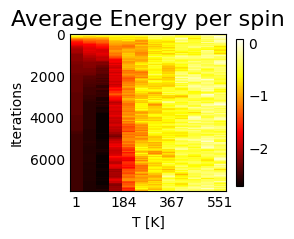

In [36]:
# @title Displays avrage energy graph { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
z1 = energy_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z1, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Energy per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

**Grid configuration at different tempratures**

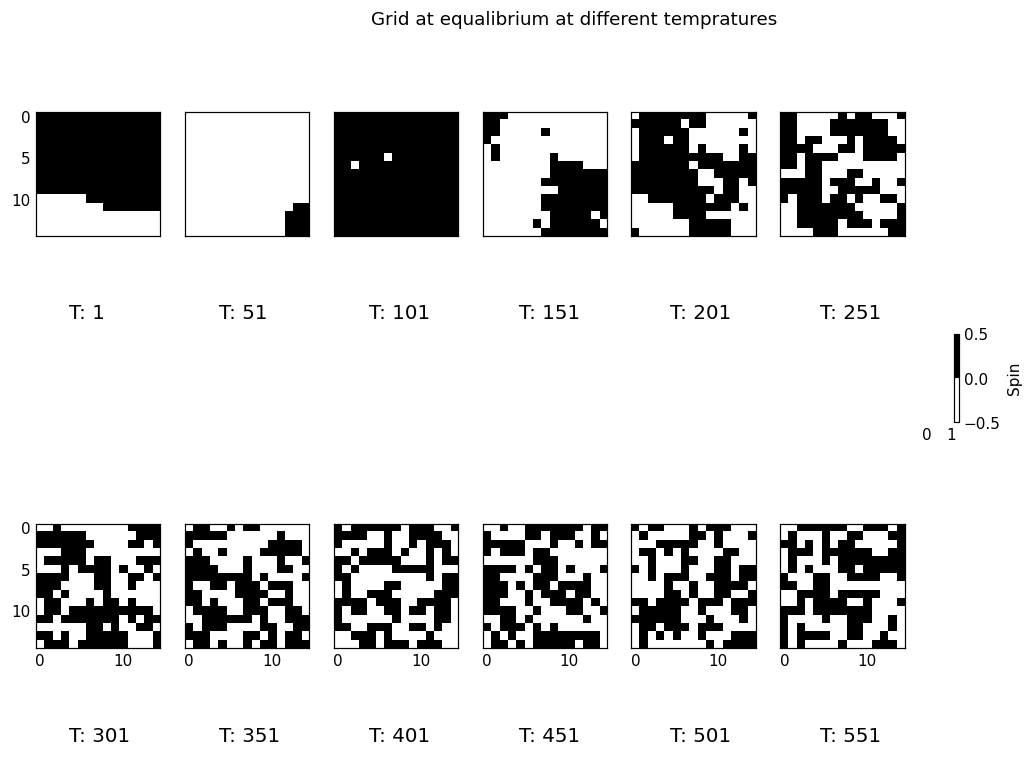

In [37]:
# @title Displays grid configs { display-mode: "form" }
Z_by_T = [properties_dictionary[t][0] for t in range(1,max_temp,50)]
Nr = 2
Nc = int(len(Z_by_T)/2)

fig, axs = plt.subplots(Nr, Nc, sharex='col', sharey='row', figsize=(10,7), dpi = 110)
fig.suptitle('Grid at equalibrium at different tempratures')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.445, 0.05, 0.115], frameon=False)
cbar_ax.tick_params(left=False, labelleft=False,bottom=False, top=False)

images = []
cmap = colors.ListedColormap(['white', 'black'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
c=0
for i in range(Nr):
    for j in range(Nc):
      data = Z_by_T[c]
      im = axs[i, j].imshow(data, cmap=cmap, norm=norm)
      images.append(im)
      axs[i, j].label_outer()
      fig.text(j/(Nc*1.22) + 0.04 , 1 - (1.1*i/Nr + 0.42), f"T: {range(1,max_temp,50)[c]}", fontdict={'fontsize': 13})
      c += 1

fig.colorbar(images[5], ax=cbar_ax, label='Spin', extend='neither', fraction=0.5)
plt.show()

**From the figure above we can clearly see the spin Island I mentioned in the previous section.**

**This is the result that for a given spin the energy will be lower if the spins neighbouring him are from the same type (up/down).**

**In the figure below we can see the behavior of the spin as a function of both iterations and temprature.**

**Here the behavior is very different. This is because of the small $J$ value.**

**A small J value means that it is much more probable to find a system at a higher energy state. This results in a large flactuations in energy and a system that does not tend to a specific state.**

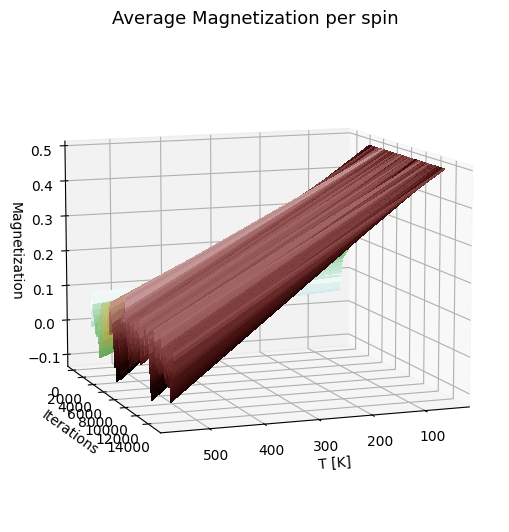

In [ ]:
# @title Displays average magnetization { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
z2 = average_magnetization_per_spin_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z2, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Magnetization per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

# **Summary Ising Model**
**Ising model is a model that tries to predict the magnetic nature of materials (response to external electric field)**

**In the simulations we could see the threshold for ferromagnetic behavior. For example in the first part we saw that if a material has a magnetic moment $μ$, in low tempratures it will exhibit ferromagnetic properties even if the magnetic moment is relativly low.**

# **Important note**:
#### We took $J > 0$ so we modeled a ferromagnet if we would take $J < 0$ we would be modeling an anti-ferromagnet!

**In the second part of the simulation (nearest neighbours interactions) we saw a sort of a phase transion from an unorder spin grid to an ordered spin grid.**

**The transition between these phases is dependent on the value of $J$ relative to the temprature.**

## **Adding external magnetic field**
Adding an external magnetic field will "push" the spins to orient in the direction of the field and will possibly help "guide" the grid (material) to a uniform spin grid. For a ferromagnet this will cause the spins to orient in the direction of the external field.